<a href="https://colab.research.google.com/github/isha027/Statistic-Analysis/blob/main/StatisticalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given: The population data in the csv format with a single column – “Movie Length” (the movie lengths are in minutes)

Required to find:

(1) Find the mean and variance of the population data and also, plot its density plot.

(2) Generate random samples of size n, using simple random sampling with replacement.

(3) Plot a histogram of the means of these samples, and also calculate the mean and standard deviation of these means.

Procedure:

(1) We find the mean and variance of the population data and also, plot its density plot.

(2) Then, 100 random samples of size n from the population dataset are generated.

n = sample size: 30

Sampling scheme: Simple random sampling with replacement

(3) Sample mean of each sample is calculated. 100 sample means
are obtained.

(4) Histogram of 100 sample means is plotted.

(5) Mean and standard deviation of 100 sample means is
calculated.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files

In [ ]:
uploaded = files.upload()
Big_data = pd.read_csv(io.BytesIO(uploaded['teststat.csv'])) # population data

Saving teststat.csv to teststat (1).csv


In [ ]:
Big_data.head(210)

,Movie Length
0,169
1,154
2,169
3,152
4,176
...,...
205,92
206,140
207,149
208,104


In [ ]:
# Calculating mean (mu) and variance ((sigma)^2) from population data (Big_data):
population = np.array(Big_data['Movie Length'])
print("Population Mean:" , population.mean()) # mu
print("Population Size :" , len(population))
print("Population Variance : ", population.var()) #(sigma)^2
print("Population Standard deviation :", population.std())

Population Mean: 149.5047619047619
Population Size : 210
Population Variance :  1128.3166439909298
Population Standard deviation : 33.590424885537395


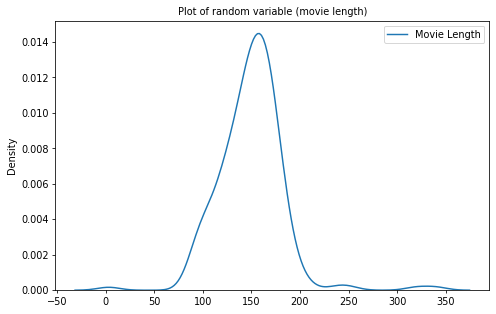

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5), dpi= 70)
sns.kdeplot(Big_data, color="dodgerblue")
plt.title('Plot of random variable (movie length)', fontsize=10)
plt.show();
#Density plot is used to show probability density function of a random variable

In [ ]:
# Drawing 100 random samples of size = Sample_size from the population, with sampling scheme = simple random sampling with replacement:
Sample_size = 30
data = np.empty([100, Sample_size])
for i in range(100):
  data[i] = np.array((Big_data.sample((30), replace = True))['Movie Length'])  #random sampling from population , with replacement
print(data)

[[162. 148. 157. ... 182. 165. 157.]
 [138. 130.  93. ... 169. 143. 122.]
 [122. 138. 106. ... 139. 176. 158.]
 ...
 [161. 163. 142. ... 106.  95. 161.]
 [145. 171. 161. ... 157. 182. 182.]
 [149. 129. 112. ... 138. 161. 169.]]


In [ ]:
# Calculating and storing sample means of these 100 random samples:
Sample_means_collection = np.zeros(100)
for i in range(100):
  Sample_means_collection[i] = data[i].mean()

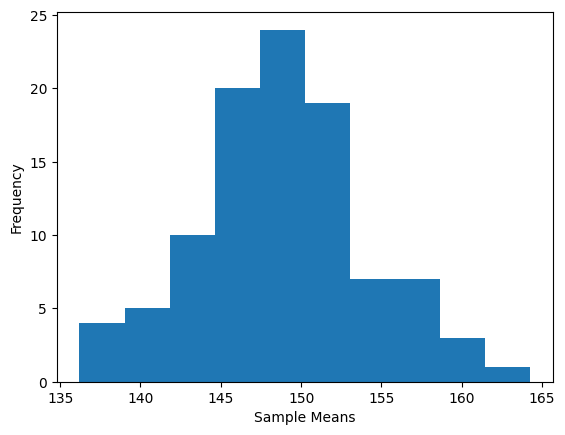

In [ ]:
# Plotting the 100 sample means:
plt.hist(Sample_means_collection)
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Calculating the mean and standard deviation of these 100 sample means:
print("Mean of Sample means: ", Sample_means_collection.mean())
print("Standard deviation of Sample means:", Sample_means_collection.std())

Mean of Sample means:  149.53133333333332
Standard deviation of Sample means: 7.090726055912752
